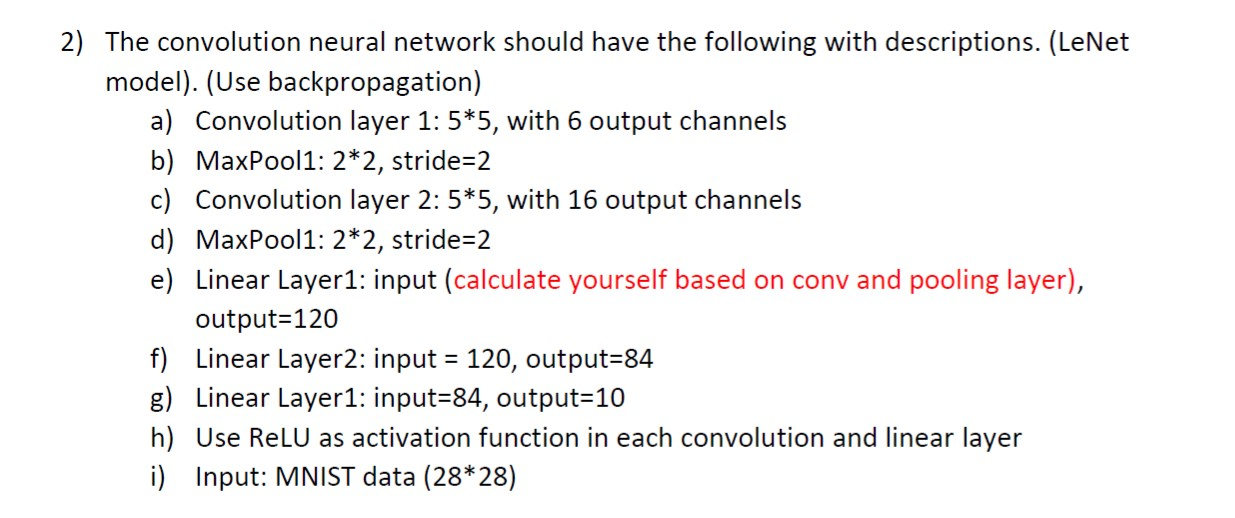

**Imports**

In [35]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time
import torch.nn.functional as F

**Device Configuration**

In [36]:
device = 'cpu'

**Hyperparameters**

In [37]:
num_classes = 10
num_epochs = 10
batch_size = 100

**MNIST Dataset**

In [38]:
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

train_data = torchvision.datasets.MNIST(root='/content/sample_data', train=True, transform=transforms, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, shuffle=True, batch_size=batch_size)

test_data = torchvision.datasets.MNIST(root='/content/sample_data', train=False, transform=transforms, download=True)
test_loader = torch.utils.data.DataLoader(dataset=train_data, shuffle=True, batch_size=batch_size)

**Checking the dataset**

In [39]:
print(train_data.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


**Neural Network**

In [40]:
test_error = []

In [41]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(in_features= 400, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = x.view(-1, 400)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [42]:
def train_and_plot(model, learning_rate):
    start = time.time()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_arr = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_arr.append(loss.item())

    end = time.time()
    print(f"Training time: {end - start} s")
    plt.plot(loss_arr)
    plt.xlabel("epochs")
    plt.ylabel("loss in learning rate " + str(learning_rate))
    plt.title("Epoch vs Loss Curve")


In [43]:
def train_test_acc(model):
  with torch.no_grad(): # to stop tracking we will use torch.no_grad()
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
      outputs = model(images)

      _, predictions = torch.max(outputs, 1)
      n_samples += labels.shape[0]
      n_correct += (predictions==labels).sum().item()

  acc = 100*(n_correct/n_samples)
  test_error.append(100 - acc)
  print("Accuracy on train data is :", acc)

  with torch.no_grad(): # to stop tracking we will use torch.no_grad()
      n_correct = 0
      n_samples = 0
      for images, labels in test_loader:
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()

  acc = 100*(n_correct/n_samples)
  print("Accuracy on test data is :", acc)

In [44]:
def losscalculation(model, learning_rate):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  n_total_steps = len(train_loader)
  for i, (images, labels) in enumerate(train_loader):
      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  print("Loss on train data is :", loss.item())

  n_total_steps = len(test_loader)
  for i, (images, labels) in enumerate(test_loader):

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  print("Loss on test data is :", loss.item()) 

**For Learning rate 0.025**

Training time: 171.50591254234314 s
Loss on train data is : 0.06281254440546036
Loss on test data is : 0.01948154717683792
Accuracy on train data is : 98.70666666666666
Accuracy on test data is : 98.70666666666666


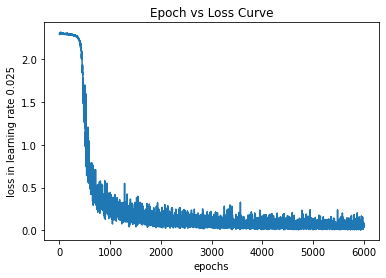

In [45]:
model1 = ConvNet().to(device)
train_and_plot(model1, 0.025)
losscalculation(model1, 0.025)
train_test_acc(model1)

**For Learning rate 0.05**

Training time: 168.7835931777954 s
Loss on train data is : 0.007625954691320658
Loss on test data is : 0.11264553666114807
Accuracy on train data is : 99.23333333333333
Accuracy on test data is : 99.23333333333333


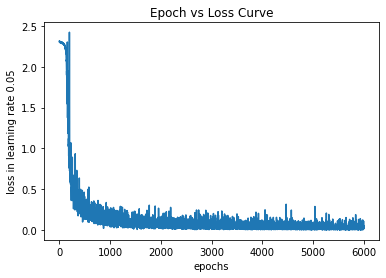

In [46]:
model2 = ConvNet().to(device)
train_and_plot(model2, 0.05)
losscalculation(model2, 0.05)
train_test_acc(model2)

**For Learning rate 0.1**

Training time: 170.2538125514984 s
Loss on train data is : 0.03009629249572754
Loss on test data is : 0.05416180193424225
Accuracy on train data is : 99.595
Accuracy on test data is : 99.595


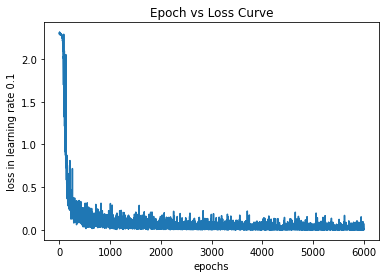

In [47]:
model3 = ConvNet().to(device)
train_and_plot(model3, 0.1)
losscalculation(model3, 0.1)
train_test_acc(model3)

**For Learning rate 0.2**

Training time: 172.9958460330963 s
Loss on train data is : 0.0017451776657253504
Loss on test data is : 0.002992522669956088
Accuracy on train data is : 99.74166666666666
Accuracy on test data is : 99.74166666666666


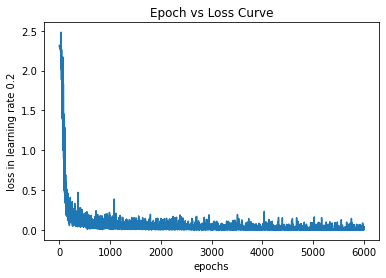

In [48]:
model4 = ConvNet().to(device)
train_and_plot(model4, 0.2)
losscalculation(model4, 0.2)
train_test_acc(model4)

**For Learning rate 0.5**

Training time: 170.88639879226685 s
Loss on train data is : 0.06988063454627991
Loss on test data is : 0.11806430667638779
Accuracy on train data is : 98.91833333333334
Accuracy on test data is : 98.91833333333334


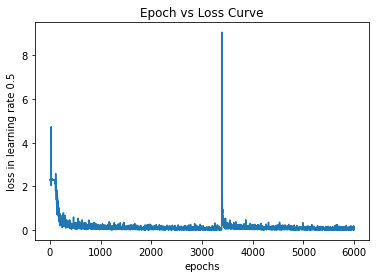

In [49]:
model5 = ConvNet().to(device)
train_and_plot(model5, 0.5)
losscalculation(model5, 0.5)
train_test_acc(model5)

**Test error vs Learning rate Curve**

Text(0.5, 1.0, 'Test Error vs Learning Rate Curve')

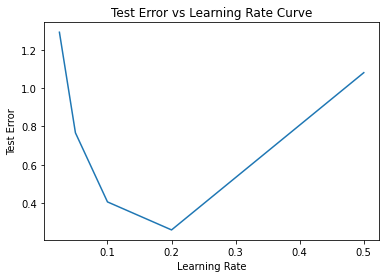

In [50]:
plt.plot([0.025, 0.05, 0.1, 0.2, 0.5], test_error)
plt.xlabel("Learning Rate")
plt.ylabel("Test Error")
plt.title("Test Error vs Learning Rate Curve")

**Answer to the Question 6 b**

I will prefer the learning rate to be 0.2 as the test error is minimum as shown in the above digram.

**Case of Varying Learning rate**

In [53]:
model6 = ConvNet().to(device)
initial_learning_rate = 0.8
criterion = nn.CrossEntropyLoss()

Training time: 172.83790278434753 s


Text(0.5, 1.0, 'Epoch vs Loss Curve')

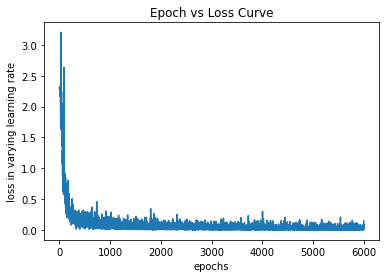

In [54]:
loss_arr = []
start = time.time()
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    learning_rate = initial_learning_rate/1.5
    optimizer = torch.optim.SGD(model6.parameters(), lr=learning_rate)
    for i, (images, labels) in enumerate(train_loader):

        # forward pass
        outputs = model6(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_arr.append(loss.item())

end = time.time()
print(f"Training time: {end - start} s")
plt.plot(loss_arr)
plt.xlabel("epochs")
plt.ylabel("loss in varying learning rate")
plt.title("Epoch vs Loss Curve")

In [55]:
train_test_acc(model6)

Accuracy on train data is : 99.15166666666667
Accuracy on test data is : 99.15166666666667


**Answer to the Question 6 C**

1. The rate of convergence is faster in the beginning but it gradually slows down as we move towards the mimima.

2. Use of varying learning rate has slightly increased the time of execution also. 

3. Here the accuracy is very high. 

4. Lowering the learning rate also avoid gradient overshooting.